# Sistema di Face Detection per una fotocamera digitale

La ProCam s.p.a ha intenzione di lanciare sul mercato una nuova fotocamera digitale compatta ed economica destinata a piccoli fotografi in erba.

Vieni assunto come Data Scientist per realizzare il sistema di identificazione dei volti nelle immagini, questo permetterà poi ai tecnici della fotografia di ottimizzare le impostazioni per un selfie con una o più persone.

Si tratta di un problema di computer vision, più precisamente di Face Detection.

Devi fornire una pipeline scikit-learn che prende un'immagine in ingresso e ritorna una lista con le coordinate dei bounding box dove sono presenti dei volti, se nell'immagine non contiene volti la lista sarà ovviamente vuota.


NOTA:

Non ti viene fornito un dataset, sta a te cercarne uno in rete o, nella peggiore delle ipotesi, costruirlo, per semplicità non considereremo implicazioni sulle licenze ad utilizzo commerciale, si tratta pur sempre di un progetto didattico.
Non puoi utilizzare modelli pre-addestrati, devi addestrarlo tu utilizzando scikit-learn.
Stai lavorando su un sistema con ridotte capacità di calcolo, quindi il modello deve richiedere poche risorse di calcolo.
Ovviamente non ti vengono fornite indicazioni sull'implementazione, fai un'approfondita ricerca bibliografica per trovare la soluzione migliore da adottare, il notebook che consegnerai deve essere ben documentato, devi spiegare quali soluzioni hai adottato e perché ed ogni risorsa esterna (paper, blog post, codice github...) che hai utilizzato.
Il progetto è abbastanza complesso, ricorda che in caso ne avessi necessità puoi sempre chiedere aiuto ai tuoi coach nella Classe Virtuale di Machine Learning su Discord.


<span style="background-color: yellow; color: black; font-weight: bold;">sintesi passi per la risoluzione di un problema di object detection:</span>


1. Raccolta del Dataset

2. Pre-elaborazione delle Immagini

* * Le immagini devonio essere prima preprocessate per uniformità e per facilitare l'apprendimento del modello:

* * Conversione in Scala di Grigi: I volti possono essere analizzati efficacemente anche senza informazioni sul colore, il che riduce la complessità.
* * Ridimensionamento: Uniformare le dimensioni delle immagini per ridurre il carico computazionale e migliorare la velocità di elaborazione.
* * Normalizzazione: Normalizzare le intensità dei pixel per migliorare la convergenza durante l'addestramento.

3. Estrazione delle Caratteristiche

* * Bisogna decidere come estrarre le caratteristiche dalle immagini preprocessate. Alcune tecniche popolari includono:

* * Histogram of Oriented Gradients (HOG): Efficace per la rilevazione di oggetti come volti.
* * Haar Features: Usato comunemente per la rilevazione di volti, sebbene richieda un addestramento intensivo.
* * Reti neurali Convoluzionali: rappresenta l'attuale state of art nell' ambito della computer vision e in particolare nei compiti di object detection. L'addestramento del modello è molto oneroso oltr al fatto che richiede un ingente quantità di dati per essere allenato.

4. Addestramento del Modello

* * Considerando il requisito di limitate capacità di calcolo:

* * * Support Vector Machine (SVM): Può essere addestrato per distinguere tra "volto" e "non volto" usando le caratteristiche estratte.
* * * Adaptive Boosting (AdaBoost): Adatto per migliorare la performance di classificatori deboli e può essere usato per rafforzare la rilevazione di volti.

5. Implementazione della Pipeline in scikit-learn:

* * Preprocessing: Scala di grigi, ridimensionamento, normalizzazione.
* * Estrazione delle caratteristiche: HOG o Haar.
* * Classificatore: SVM o AdaBoost.

6. Valutazione e Ottimizzazione
* * Si valuta il modello con metriche come precision, recall, e F1-score per assicurarti che identifichi accuratamente i volti nelle immagini.
* * Tipicamente si utilizza la validazione incrociata e tecniche di ottimizzazione degli iperparametri per migliorare la performance.

7. Test su Nuove Immagini

<span style="background-color: yellow; color: black; font-weight: bold;">In particolare per questo progetto sono state fatte le seguenti scelte implementative:</span>

### Raccolta del dataset

Sono stati usati due diversi Dataset, uno contenente volti umani e l'altro contenente immagini di vario tipo, escluse quelle di persone.

* Esempi Positivi:

E' stato deciso di utilizzare CelebFaces Attributes Dataset (CelebA), un dataset che contiene molte immagini di volti in varie condizioni di illuminazione e pose. 

In particolare contiene più di 200K immagini di celebrità, ciascuna con 40 annotazioni di attributi. 

Le caratteristiche chiave sono le seguenti:

* * numero di persone considerate: 10.177

* * immagini totali: 202.599

* * 20 posizioni di riferimento, 

* * 40 annotazioni di attributi per immagine.

Il set di dati può essere utilizzato come set di addestramento e test per le seguenti attività di visione artificiale: riconoscimento degli attributi facciali, riconoscimento facciale, rilevamento dei volti, localizzazione dei punti di riferimento (o parti del viso) e modifica e sintesi dei volti.

Scaricabile all'indirizzo: [Labeled Faces in the Wild](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).


* Esempi negativi:

[Immagini naturali](https://www.kaggle.com/datasets/prasunroy/natural-images?resource=download)

Immagini naturali: un set di dati costituito da 6899 immagini in 8 classi distinte che includono: aereomobili, automobili, gatti, cani, fiori, frutta, moto e persone.
In particolare quest'ultima classe è stata rimossa dal dataset prima del suo utilizzo.

<span style="color: #99CC99; font-weight: bold;">*Il modello è stato addestrato solo su un sottoinsieme del primo dataset (circa 10000 osservazioni) e ha usato tutto il secondo dataset nel caso degli esempi negativi (circa 5000 osservazioni).*</span>



### Estrazione delle Caratteristiche

Delle tre tecniche precedentemente esposte quelle effettivamente utilizzabili al fine di rispettare la consegna di questo progetto sono la Histogram of Oriented Gradients (HOG) e la Haar Features.

Sebbene tra le due quella più promettente è la HOG in quanto è computazionalmente efficiente con un accuratezza molto alta è stato deciso di usare la Haar Features Cascade in quanto, per svago, si è deciso di implementare l'algoritmo da zero senza l'ausilio di nessuna libreria di *scikit-learn*


<span style="color: #99CC99; font-weight: bold;">**Introduzione**</span>


I classificatori a cascata di Haar, introdotti da Paul Viola e Michael Jones nel loro articolo del 2001 "Rapid Object Detection using a Boosted Cascade of Simple Features", rappresentano una tecnica pionieristica per il rilevamento di oggetti in immagini. Questo metodo è stato utilizzato principalmente per il riconoscimento facciale, ma la sua flessibilità permette di adattarlo a una vasta gamma di oggetti. La tecnica della cascata di Haar sfrutta un insieme di strumenti di apprendimento automatico e di elaborazione delle immagini per identificare oggetti in maniera rapida e precisa, rivoluzionando così il campo del riconoscimento delle immagini.


<span style="color: #99CC99; font-weight: bold;">**Concetti Fondamentali**</span>

* Caratteristiche Haar-like

    Le caratteristiche Haar-like sono il cuore del metodo Haar Cascade. Queste caratteristiche derivano il loro nome da Alfred Haar, un matematico ungherese che ha sviluppato i concetti alla base delle trasformazioni di Haar. Le caratteristiche Haar-like consistono in regioni rettangolari adiacenti in una finestra di rilevamento, in cui viene calcolata la somma dei pixel per valutare le differenze di intensità tra aree chiare e scure. Alcuni esempi di caratteristiche Haar includono:

* * Caratteristiche edge: Queste confrontano la luminosità di due rettangoli adiacenti, uno chiaro e uno scuro. Ad esempio, una caratteristica edge verticale potrebbe consistere in un rettangolo chiaro a sinistra e uno scuro a destra. Questa configurazione permette di rilevare bordi verticali all'interno dell'immagine.

* * Caratteristiche line: Queste confrontano tre rettangoli adiacenti, dove il rettangolo centrale è scuro e i rettangoli ai lati sono chiari (o viceversa). Questa configurazione è utile per rilevare strutture lineari all'interno dell'immagine.

* * Caratteristiche a quattro rettangoli: Queste confrontano l'intensità tra quattro rettangoli disposti a griglia. Questa configurazione è utilizzata per rilevare variazioni più complesse di luminosità.

    Le caratteristiche Haar sono molto efficienti da calcolare grazie alla rappresentazione dell'immagine integrale (integral image), che permette di ottenere la somma dei pixel in un rettangolo in tempo costante.

* Immagine Integrale

    L'immagine integrale è una rappresentazione dell'immagine originale che consente di calcolare rapidamente la somma dei pixel in qualsiasi rettangolo dell'immagine. Questa tecnica, introdotta da Viola e Jones, trasforma l'immagine in modo che ogni pixel dell'immagine integrale rappresenti la somma di tutti i pixel sopra e a sinistra di esso nell'immagine originale. Questo permette di calcolare la somma dei pixel in un rettangolo specifico in tempo costante, indipendentemente dalle dimensioni del rettangolo, rendendo il calcolo delle caratteristiche Haar molto efficiente.

* Training con Adaboost

    Adaboost (Adaptive Boosting) è una tecnica di machine learning utilizzata per migliorare la precisione dei classificatori. In questo contesto, Adaboost è utilizzato per selezionare le caratteristiche Haar più rilevanti tra migliaia di potenziali caratteristiche. Durante il processo di addestramento, Adaboost combina deboli classificatori per formare un forte classificatore. Un debole classificatore è uno che è solo leggermente migliore di una previsione casuale. Adaboost assegna pesi maggiori agli esempi che sono stati classificati erroneamente, migliorando così la precisione del classificatore finale.

    Il processo di Adaboost funziona come segue:

* * Inizialmente, tutti gli esempi di training sono pesati equamente.
* * Ad ogni iterazione, viene addestrato un debole classificatore sulle caratteristiche Haar.
* * Gli esempi che sono stati classificati erroneamente ricevono un peso maggiore.
* * Alla fine del processo, i deboli classificatori sono combinati in un forte classificatore ponderando le loro decisioni in base alla loro precisione.

* Cascata di Classificatori

    La cascata di classificatori è una sequenza di classificatori che vengono applicati sequenzialmente a una finestra di immagine. Ogni classificatore nella cascata filtra le finestre che non contengono l'oggetto di interesse, riducendo così il numero di finestre da analizzare nelle fasi successive. Questo approccio a cascata aumenta significativamente la velocità di rilevamento, poiché le finestre che non passano i primi classificatori vengono scartate rapidamente, evitando di eseguire calcoli più complessi sulle finestre non rilevanti.

    La cascata è strutturata in livelli, dove ogni livello contiene un forte classificatore addestrato con Adaboost. I primi livelli contengono classificatori semplici e veloci, mentre i livelli successivi contengono classificatori più complessi. Questo design permette di ottenere un bilancio ottimale tra velocità e accuratezza.

* Finestra di Rilevamento

    La finestra di rilevamento è un concetto chiave nel metodo Haar Cascade. Si tratta di una finestra di dimensioni fisse che viene fatta scorrere sull'immagine per cercare l'oggetto di interesse. Ogni posizione della finestra viene valutata utilizzando i classificatori a cascata. Le finestre che superano tutti i livelli della cascata sono considerate contenere l'oggetto di interesse.

    Per rilevare oggetti di diverse dimensioni, la finestra di rilevamento viene ridimensionata e applicata nuovamente all'immagine. Questo processo è noto come rilevamento multiscala.



<span style="color: #99CC99; font-weight: bold;">**Bibliografia e Citazioni**</span>

Viola, P., & Jones, M. (2001). Rapid object detection using a boosted cascade of simple features. In Proceedings of the 2001 IEEE Computer Society Conference on Computer Vision and Pattern Recognition. CVPR 2001.

[Link: IEEE Xplore](https://ieeexplore.ieee.org/document/990517)

Lienhart, R., & Maydt, J. (2002). An extended set of Haar-like features for rapid object detection. In Proceedings. International Conference on Image Processing.

[Link: IEEE Xplore](https://ieeexplore.ieee.org/document/1038171)

OpenCV Documentation. Haar Feature-based Cascade Classifier for Object Detection.

[Link: OpenCV Docs](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)

Papageorgiou, C., Oren, M., & Poggio, T. (1998). A general framework for object detection. In International Conference on Computer Vision.

[Link: MIT AI Lab](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.59.4302&rep=rep1&type=pdf)



In particolare la parte **utilities** comprende:

* <span style="color: #FFCCCC; font-weight: bold;">**WeakClassifier:**</span> rappresenta un classificatore debole.

* <span style="color: #FFCCCC; font-weight: bold;">**Haar:**</span>  rappresenta una Feature Haar.

* <span style="color: #FFCCCC; font-weight: bold;">**HetHaarScoreFast:**</span> è una funzione che permette di calcolare il valore di una feature Haar all'interno di una sottofinestra, fa uso delle funzioni <span style="color: #FFCCCC; font-weight: bold;">**subwindow_integral**</span> e <span style="color: #FFCCCC; font-weight: bold;">**blockSum**</span>.

* <span style="color: #FFCCCC; font-weight: bold;">**preProcessingImage:**</span> è una funzione che preprocessa l'immagine, le modifice applicate comprendono: conversione in scala di grigi, normalizzazzione di ciascun pizzel nell'intervallo 0-1 e ridimensionamento dell'immagine.

* <span style="color: #FFCCCC; font-weight: bold;">**detect_faces:**</span> è una funzione che dato in input una lista di classificatori deboli e un'immagine ritorna le coordinate dei cerchi che racchiudono la superficie dei volti rilevati.

* <span style="color: #FFCCCC; font-weight: bold;">**non_max_suppression_circles:**</span> una funzione che riduce il numero di cerchi disegnati in un immagine, in particolare elimina i cerchi la cui area è sovrapposta di una certa quantità (definita dal parametro treshold) rispetto ad altri cerchi aventi importanza maggiore (scores più alta).

* Le funzioni rimanenti sono utilities il cui nome è esplicativo della funzione svolta.


La parte **Pre-elaboration** comprende:

* Una pipeline costituita da due diverse funzionalità:

    1. importazione delle immagini e creazione del dataset di Addestramento e Test:
    E' stato usato il metodo di validazione Hold-Out in quanto il cross-validation ritenuto troppo oneroso.
    La scelta è stata comunque giustificata dalla facilità dell'algoritmo di riconoscere i volti.

    2. Creazione delle Features Haar: 
    sono state definite 6 diversi tipologie di Caratteristiche, per ognuna di queste sono state generate 4 dimensioni diverse rispettivamente di 1, 3, 5 e 7, che a loro volta sono servite per generare una Features con uno start_point diverso in modo tale da coprire tutte le possibili posizioni dell immagine.
    Totale features Haar: 6*4*80*80=153600, dove 80*80 è la dimensione in pixel dell immagine.


La parte **Training** comprende:

* L'algoritmo Haar Cascade che fa uso di adaboost:
in particolare questo algoritmo è costituito da due cicli **while** principali:

    1. il primo definito da: **while F_i >= F_target**, dove la condizione di arresto coincide col aver trovato una cascata di classificatori che hanno un errore minore o uguale a F_target.
    
    2. il secondo definito da: **while (TP/nrPos<0.6) and (TN/nrNeg<0.6)**, dove la condizione di arresto coincide col aver trovato un classificatore debole la cui precisione nel calcolare i True Positive e i True Negative sia almeno di 0.6.
    In questo ciclo vengono asseganti poi dei pesi ai classificatori deboli che sono sono inversamente proporzionali all'errore commesso da quest ultimo nel rilevare i volti nelle immagini.
    Sempre all'interno di questo ciclo vengono definiti dei pesi per ciascuna immagine, direttamente proporzionali all'errore commesso dall algoritmo nel classificarle, intuitivamente si assegna un peso maggiore alle immagini che sono state classsificate erroneamente più volte in modo tale che si possa prestare maggiore attenzione a tali immagini nell'iterazione successiva.
    
    3. la parte di training è stata eseguita in due trance, causa problemi di memory overflow. In particolare il primo addestramento è stato eseguito prendendo in considerazione, per le osservazioni positive, un dataset comprendente le immagini comprese negli indici: 0-5000 e il secondo le immagini comprese negli indici: 5001-10000.

    
La parte **Test** comprende:

* L'applicazione dell'algoritmo su dati mai visti prima e la relativa stampa delle metriche usate per valutarlo, le principali sono TP, TN, FP, FN, F_i


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import zipfile
import pickle
from PIL import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from training_utils import convertball, showball, training_set_util
import dill
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns
from math import log
from math import ceil
import os
import time
import copy
import ipywidgets as widgets
from IPython.display import display



### Utilities

In [123]:
## Adaboost is use
window_size = 80


class Haar(object):
    def __init__(self, type, feature, size, shape, start):
        self.type=type
        self.feature = cv2.resize(feature, (shape[1]*size, shape[0]*size), interpolation=cv2.INTER_NEAREST)
        self.start = start
        self.size=size
        self.shape = shape



class WeakClassifier(object):
    def __init__(self, haar, theta, sign, weight):
        self.haar = haar
        self.theta = theta
        self.sign = sign
        self.weight = weight



def blockSum(integral, w, h, w_kernel_size, h_kernel_size):
    
    endw = w + w_kernel_size - 1
    endh = h + h_kernel_size - 1

    if endh >= integral.shape[0] or endw >= integral.shape[1]:
        return 0
    
    sum = integral[int(endh), int(endw)]

    if (w > 0):
        sum -= integral[int(endh), int(w - 1)]
    if (h > 0):
        sum -= integral[int(h - 1), int(endw)]
    if (h > 0 and w > 0):
        sum += integral[int(h - 1), int(w - 1)]
    return sum



def subwindow_integral(subwindow):
    integral = np.zeros(subwindow.shape)

    for r in range(subwindow.shape[0]):
        for c in range(subwindow.shape[1]):
            greyIntegralVal = subwindow[r,c]

            if (r - 1 >= 0 and c - 1 >= 0):
                greyIntegralVal -= integral[r-1,c-1]

            if (r - 1 >= 0):
                greyIntegralVal += integral[r-1,c]

            if (c - 1 >= 0):
                greyIntegralVal += integral[r,c-1]

            integral[r,c]  = greyIntegralVal

    return integral



def get_haar_score_fast(haar, subwindow, subwindow_integral):

    #r = haar.start[0]*haar.size
    #c = haar.start[1]*haar.size
    r = haar.start[0]
    c = haar.start[1]
    size_w = haar.feature.shape[1]
    size_h = haar.feature.shape[0]

    try:

        if size_w==2 and size_h==2:
            # Simple feature, not using integral
            if haar.type==1:
                return subwindow[r,c]+subwindow[r+1,c]-subwindow[r,c+1]-subwindow[r+1,c+1]
            elif haar.type==2:
                return subwindow[r,c]+subwindow[r,c+1]-subwindow[r+1,c]-subwindow[r+1,c+1]
            elif haar.type==5:
                return subwindow[r,c]+subwindow[r+1,c+1]-subwindow[r,c+1]-subwindow[r+1,c]
            elif haar.type==6:
                return subwindow[r+1,c]+subwindow[r,c+1]-subwindow[r,c]-subwindow[r+1,c+1]
        else:
            # More complex features, using integral to reduce array references
            if haar.type==1:
                return blockSum(subwindow_integral, c, r, size_w / 2, size_h) - blockSum(subwindow_integral, c + (size_w / 2), r, size_w / 2, size_h)
            elif haar.type==2:
                return blockSum(subwindow_integral, c, r, size_w, size_h / 2) - blockSum(subwindow_integral, c, r + (size_h / 2), size_w, size_h / 2)
            elif haar.type==3:
                return blockSum(subwindow_integral, c, r, size_w, size_h) - 2 * blockSum(subwindow_integral, c + (size_w / 3), r, size_w / 3, size_h)
            elif haar.type==4:
                return blockSum(subwindow_integral, c, r, size_w, size_h) - 2 * blockSum(subwindow_integral, c, r + (size_h / 3), size_w, size_h / 3)
            elif haar.type==5:
                return blockSum(subwindow_integral, c, r, size_w, size_h) - 2 * (blockSum(subwindow_integral, c + (size_w / 2), r ,size_w / 2, size_h / 2) + blockSum(subwindow_integral, c, r + (size_h / 2), size_w / 2, size_h / 2))
            elif haar.type==6:
                return blockSum(subwindow_integral, c, r, size_w, size_h) - 2 * (blockSum(subwindow_integral, c, r, size_w / 2, size_h / 2) + blockSum(subwindow_integral, c + (size_w / 2), r + (size_h / 2), size_w / 2, size_h / 2))
            elif haar.type==7:
                if (size_w == 3):
                    return blockSum(subwindow_integral, c,r, size_w, size_h) - 2 * subwindow[r + 1, c + 1]
                else:
                    return blockSum(subwindow_integral, c, r, size_w, size_h) - 2 * blockSum(subwindow_integral, c + (size_w / 3), r + (size_h / 3), size_w / 3, size_h / 3)
    
    except IndexError:
        return 0.0


def feature_weighted_error_rate(actual, predicted, weights):
    return sum(weights*(np.not_equal(actual, predicted)))



def predict(score, classifier):
    if score<classifier.theta:
        return -classifier.sign
    return classifier.sign



def display(fovea):
    plt.imshow(fovea, interpolation='nearest')
    plt.show()



def preProcessingImage(path, to_grayscale=False, to_normalized=False, to_resize=None):
    
    if type(path) == str:
        img = cv2.imread(path)  
    else:
        img = path

    if to_grayscale == True:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if to_normalized == True:
        img = img / 255.0

    if to_resize != None:
        img = cv2.resize(img, (to_resize, to_resize))
    
    return img



def get_positive_samples(path):
    positive_samples = []
    for file in os.listdir(path):
        if file.endswith(".jpg") or file.endswith(".png"):
            img = preProcessingImage(os.path.join(path, file), to_grayscale=True, to_normalized=True, to_resize=window_size)
            positive_samples.append(img)

    return positive_samples



def get_negative_samples(path):
    negative_samples = []
    for file in os.listdir(path):
        if file.endswith(".jpg") or file.endswith(".png"):
            img = preProcessingImage(os.path.join(path, file), to_grayscale=True, to_normalized=True, to_resize=window_size)
            negative_samples.append(img)
    return negative_samples



def detect_faces(original_image, original_classifier, priority_big_scale, no_max_suppression_treshold=0, observation_for_circles=0.7):

    classifier = copy.deepcopy(original_classifier) 
    number_classifier = len(classifier)
    image = preProcessingImage(original_image, to_grayscale=True, to_normalized=True, to_resize=window_size)
    integral_image = subwindow_integral(image)


    circles = []
    squares = [1,2,4]

    for q in squares:

        height = image.shape[0]/q
        width = image.shape[1]/q

        for y in range(0, int(image.shape[0] - height + 1) , 4):
            for x in range(0, int(image.shape[1] - width + 1), 4):

                strong_score = 0
                sum_weight = 0
                points = []
                classifier = copy.deepcopy(original_classifier) 

                for weak_clf in classifier:
                         
                    new_size = int(weak_clf.haar.size/(q/2)) if q > 1 else weak_clf.haar.size
                    new_start = (int(weak_clf.haar.start[0]/q + x),  int(weak_clf.haar.start[1]/q + y))
                    weak_clf.haar = Haar(weak_clf.haar.type, weak_clf.haar.feature, weak_clf.haar.size, weak_clf.haar.shape, new_start)

                    strong_score += weak_clf.weight * predict(get_haar_score_fast(weak_clf.haar, image, integral_image), weak_clf)
                    sum_weight += weak_clf.weight

                clas = np.sign(strong_score)

                #treshold is a quantity that is comprise from -1 to 1: 1 when all weak classifier return class 1.
                treshold = strong_score/sum_weight

                if treshold > 0.1:

                    for weak_clf in classifier:
                        points.append((weak_clf.haar.start[0], weak_clf.haar.start[1]))
    
                    center, radius = compute_simple_circle(points, threshold_ratio=observation_for_circles)
                    circles.append((int(center[0]), int(center[1]), int(radius), q^(-1) if priority_big_scale == True else q^(2) ))

    return non_max_suppression_circles(circles, no_max_suppression_treshold)

    


def circle_intersection_area(c1, r1, c2, r2):
    # Calcola la distanza Euclidea tra i centri dei cerchi
    d = np.linalg.norm(np.array(c1) - np.array(c2))

    # Caso in cui i cerchi non si sovrappongono
    if d >= r1 + r2:
        return 0.0

    # Caso in cui un cerchio è completamente contenuto nell'altro
    if d <= abs(r1 - r2):
        return np.pi * min(r1, r2) ** 2

    # Calcola l'area di intersezione tra i cerchi
    a = r1 ** 2
    b = r2 ** 2
    x = (a - b + d ** 2) / (2 * d)
    z = x ** 2
    y = np.sqrt(a - z)
    
    # Calcola l'area di intersezione utilizzando la formula della sezione circolare
    if d < r1 - r2 or d < r2 - r1:
        return np.pi * min(r1, r2) ** 2
    else:
        return a * np.arcsin(y / r1) + b * np.arcsin(y / r2) - y * (x + np.sqrt(z + b - a))




def circle_iou(c1, r1, c2, r2):
    inter_area = circle_intersection_area(c1, r1, c2, r2)
    union_area = np.pi * (r1 ** 2) + np.pi * (r2 ** 2) - inter_area
    return inter_area / union_area



def non_max_suppression_circles(circles, overlapThresh):
    
    if len(circles) == 0:
        return [(0, 0, 1, 0)]

    if len(circles) == 1:
        circle = circles[0]
        return [(circle[0], circle[1], circle[2], circle[3])]

    circles = np.array(circles)
    
    if circles.dtype.kind == "i":
        circles = circles.astype("float")

    pick = []
    x = circles[:, 0]
    y = circles[:, 1]
    r = circles[:, 2]
    scores = circles[:, 3]

    idxs = np.argsort(scores)

    while len(idxs) > 0:
        
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        suppress = [last]

        for pos in range(last):
            
            j = idxs[pos]
            iou = circle_iou((x[i], y[i]), r[i], (x[j], y[j]), r[j])
            
            if iou > overlapThresh:
                suppress.append(pos)

        idxs = np.delete(idxs, suppress)

    selected_circles = circles[pick].astype("int")

    result = [(circle[0], circle[1], circle[2], circle[3]) for circle in selected_circles]
    
    return result





# non_max_suppression for rectangle
def non_max_suppression_rectangle(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    # Converti i bounding box in un array NumPy, se necessario
    boxes = np.array(boxes)
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    score = boxes[:, 4]

    # Calcola l'area di ciascun bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    # Ordina gli indici dei bounding box per punteggio (in ordine crescente)
    idxs = np.argsort(score)

    while len(idxs) > 0:
        # Prendi l'indice dell'elemento con il punteggio più alto
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # Trova le coordinate delle intersezioni
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # Calcola larghezza e altezza dell'intersezione
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # Calcola l'area dell'intersezione e il rapporto di sovrapposizione (IoU)
        overlap = (w * h) / area[idxs[:last]]

        # Elimina gli elementi che hanno un rapporto di sovrapposizione superiore alla soglia
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    # Restituisci i bounding box selezionati
    return boxes[pick].astype("int")




def compute_circle(points, threshold_distance_percent=0.7):


    # Find the "elbow" in the elbow method graph
    def find_elbow_point(K, ssd):
        
        # Coordinates of the points
        points_elbow = np.array(list(zip(K, ssd)))
        
        # Initial point (first point)
        p1 = points_elbow[0]
        # Final point (last point)
        p2 = points_elbow[-1]
        
        # Distances of each point from the line segment p1-p2
        distances = []
        for point in points_elbow:
            distances.append(np.abs(np.cross(p2-p1, p1-point) / np.linalg.norm(p2-p1)))
        
        # Find the index with the maximum distance
        elbow_index = np.argmax(distances)
        return K[elbow_index]



    #first use k-means algorithm to detect the number of possible face
    list_points = [point[0] for point in points]
    coordinates = np.array(list_points)

    K = range(1, 5)  
    ssd = []

    for k in K:
        kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0).fit(coordinates)
        ssd.append(kmeans.inertia_)

    # Get the optimal number of clusters
    optimal_k = find_elbow_point(K, ssd)

    kmeans_final = KMeans(init="k-means++", n_clusters=optimal_k, random_state=0).fit(coordinates)
    ssd_final = kmeans_final.inertia_

    # Get cluster centers
    cluster_centers = kmeans_final.cluster_centers_

    # Get the points belonging to each cluster
    labels = kmeans_final.labels_



    def plot_clusters(model, data, axlabels=None, print_ssd=False):
        y_pred = model.predict(data)
        sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

        if axlabels!=None:
            plt.xlabel(axlabels[0], fontsize=16)
            plt.ylabel(axlabels[1], fontsize=16)

        if print_ssd:
            plt.text(X[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

        plt.show()

    
    plot_clusters(kmeans_final, coordinates, None, False)


    # Group points by cluster
    clusters = {}
    for i in range(optimal_k):
        clusters[i] = [points[j] for j in range(len(points)) if labels[j] == i]

    circles = []

    # Calculate circle for each cluster using the centroid as the center
    for cluster_id, cluster_points in clusters.items():
        
        cluster_coordinates = np.array([p[0] for p in cluster_points])
        scores = np.array([p[1] for p in cluster_points])
        
        # Use the centroid of the cluster as the center
        center_x, center_y = cluster_centers[cluster_id]
        
        # Calculate the distances from the center to each point
        distances = np.sqrt((cluster_coordinates[:, 0] - center_x)**2 + (cluster_coordinates[:, 1] - center_y)**2)
        
        # Determine the threshold distance to include the closest threshold% of points
        threshold_distance = np.percentile(distances, threshold_distance_percent * 100)
        
        # Select the points within the threshold distance
        close_points = cluster_coordinates[distances <= threshold_distance]
        close_scores = scores[distances <= threshold_distance]
        
        # Calculate the radius as the maximum distance from the center to any selected point
        radius = np.max(np.sqrt((close_points[:, 0] - center_x)**2 + (close_points[:, 1] - center_y)**2))
        
        # Calculate the score as the sum of the scores of the close points
        total_score = np.sum(close_scores)
        
        # Append the circle (x, y, radius, score) to the list
        circles.append((int(center_x), int(center_y), int(radius), total_score))
    
    return circles




def compute_simple_circle(points, threshold_ratio=0.5):

    # Convert the list of points to a NumPy array for easier manipulation
    points = np.array(points)
    
    # Calculate the initial center of the circle as the mean of the coordinates
    center_x = np.mean(points[:, 0])
    center_y = np.mean(points[:, 1])
    center = (center_x, center_y)
    
    # Calculate the distances from the initial center to each point
    distances = np.sqrt((points[:, 0] - center_x)**2 + (points[:, 1] - center_y)**2)
    
    # Determine the threshold distance
    threshold_distance = threshold_ratio * np.max(distances)
    
    # Filter points within the threshold distance from the initial center
    filtered_points = points[distances <= threshold_distance]
    
    if len(filtered_points) < 2:
        raise ValueError("Not enough points to form a circle after applying the threshold.")
    
    # Recalculate the center of the circle using the filtered points
    center_x = np.mean(filtered_points[:, 0])
    center_y = np.mean(filtered_points[:, 1])
    center = (center_x, center_y)
    
    # Recalculate the radius as the maximum distance from the new center to any filtered point
    distances = np.sqrt((filtered_points[:, 0] - center_x)**2 + (filtered_points[:, 1] - center_y)**2)
    radius = np.max(distances)
    
    return center, radius





def plot_circle(points, center, radius):
    fig, ax = plt.subplots()
    
    # Plot the points
    points = np.array(points)
    ax.scatter(points[:, 0], points[:, 1], label='Points')
    
    # Plot the circle
    circle = plt.Circle(center, radius, color='b', fill=False, label='Bounding Circle')
    ax.add_artist(circle)
    
    # Plot the center
    ax.plot(center[0], center[1], 'ro', label='Center')
    
    ax.set_aspect('equal', 'box')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Points and Bounding Circle')
    plt.legend()
    plt.grid(True)
    plt.show()




#Function to write in a file the coordinates of the image given in the path
def draw_rectangle(images_path, output_file):
    # Load the Haar Cascade model for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Open the output file
    with open(output_file, 'w') as f:
        # Write the file header
        f.write("image_id x_1 y_1 width height\n")
        
        # Iterate through all images in the specified directory
        for image_name in os.listdir(images_path):
            
            # Construct the full path of the image
            image_path = os.path.join(images_path, image_name)
            
            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error loading image: {image_path}")
                continue
            
            # Convert the image to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Detect faces in the image
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
            
            # For each detected face, save the rectangle coordinates and dimensions
            for (x, y, w, h) in faces:
                f.write(f"{image_name} {x} {y} {w} {h}\n")
                
                # Draw the rectangle on the image (optional, for visualization only)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                
                # Show the image with the rectangle (optional, for debugging only)
                # cv2.imshow("Image with Rectangle", image)
                # cv2.waitKey(0)
                # cv2.destroyAllWindows()



# Function to draw a rectangle on the image with coordinates given
def draw_rectangle(image_path, x1, y1, x2, y2):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Rectangle color (BGR)
    color = (0, 255, 0)  # Green
    thickness = 2  # Rectangle thickness

    # Draw the rectangle on the image
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the image with the rectangle drawn
    cv2.imshow("Image with Rectangle", image_rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


#Function to draw a rectangle on the image with OpenCV
def draw_rectangle(image_path):
    # Load the Haar Cascade model for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,    # Reduce the image by 10% at each scale
        minNeighbors=3,     # Require at least 3 neighboring rectangles to confirm a face
        minSize=(20, 20)    # Minimum size of the detection rectangle
    )

    # Check if faces have been detected
    if len(faces) == 0:
        print("No faces detected")
        return

    # For each detected face, draw the rectangle on the image
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Show the image with all the rectangles drawn
    cv2.imshow("Image with Rectangle", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



### Pre-elaboration

* #### Build Training and Test Dataset 

In [3]:
# creation file Boundary.txt
#images_path = 'Dataset\\Osservazioni positive ridotte'
#output_file = 'Dataset\\Boundary.txt'

# Call the function to draw the rectangle
#draw_rectangle(images_path, output_file)


# Generate positive samples
positive_samples = get_positive_samples("Dataset\\Osservazioni positive 0-5000")
#positive_samples = get_positive_samples("Dataset\\Osservazioni positive 5001-10000")
#positive_samples_rotated = [np.rot90(np.rot90(np.rot90(el))) for el in positive_samples]
#positive_samples = positive_samples + positive_samples_rotated

# Generate Negative samples
negative_samples = get_negative_samples("Dataset\\Osservazioni negative")
#negative_samples_rotated = [np.rot90(np.rot90(np.rot90(el))) for el in negative_samples]
#negative_samples = negative_samples + negative_samples_rotated

# Shuffle all the samples
np.random.shuffle(positive_samples)
np.random.shuffle(negative_samples)

print("Total num of samples at our disposal:")
print("Positives: " + str(len(positive_samples)))
print("Negatives: " + str(len(negative_samples)))

split = 0.95
pos_split = int(len(positive_samples)*split)
neg_split = int(len(negative_samples)*split)

training_set = positive_samples[0:pos_split] + negative_samples[0:neg_split]
testing_set = positive_samples[pos_split:] + negative_samples[neg_split:]

training_integrals = [subwindow_integral(el) for el in training_set]
testing_integrals = [subwindow_integral(el) for el in testing_set]

nrPos = pos_split
nrNeg = neg_split

nrPos_test = len(positive_samples)-nrPos
nrNeg_test = len(negative_samples)-nrNeg

training_labels = [1]*nrPos + [-1]*nrNeg
testing_labels = [1]*nrPos_test + [-1]*nrNeg_test

print("For training")
print("Positives: "+str(nrPos))
print("Negatives: "+str(nrNeg))

print("For testing")
print("Positives: "+str(nrPos_test))
print("Negatives: "+str(nrNeg_test))



Total num of samples at our disposal:
Positives: 5000
Negatives: 5864
For training
Positives: 4750
Negatives: 5570
For testing
Positives: 250
Negatives: 294


* #### Build Haar Features

In [4]:

# Define haar feature types
haar1 = np.array([1, -1,
                  1, -1])
haar1.shape = (2,2)

haar2 = np.array([1, 1,
                  -1, -1])
haar2.shape = (2,2)

haar3 = np.array([1, -1, 1,
                  1, -1, 1])
haar3.shape = (2,3)

haar4 = np.array([1, 1,
                  -1, -1,
                  1, 1])
haar4.shape = (3,2)

haar5 = np.array([1, -1,
                  -1, 1])
haar5.shape = (2,2)

haar6 = np.array([-1, 1,
                  1, -1])
haar6.shape = (2,2)



# lista di caratteristiche haar, per ogni tipo vengono considerate size diverse. (start positions semrpe uguale a zero)
features_start=[]


# Define many sizes for all feature types
haar_feature_types=[haar1,haar2,haar3,haar4,haar5,haar6]
for f in range(len(haar_feature_types)):
    
    shape = haar_feature_types[f].shape
    
    if 3 in haar_feature_types[f].shape:
        max_size=4
    else:
        max_size=7

    for s in range(1, max_size+1, 2):
        features_start.append(Haar(f+1, haar_feature_types[f], s, shape, (0,0)))


# contiene tutte le caratteristiche haar usate per l algoritmo (per ogni tipo e per ogni size tutte le start positions possibili)
features = []
for j in features_start:
        
        # Get all posible starting locations for this feature
        starting_positions = []
        space = (window_size-j.shape[0]*j.size, window_size-j.shape[1]*j.size)
        
        for k in range(space[0]+1):
            for l in range(space[1]+1):
                starting_positions.append((k, l))

        for loc in starting_positions:
            features.append(Haar(j.type, j.feature, j.size, j.shape, loc))


#for f in features:
#    print(f.feature)
#    print(f.start)

features = list(features)
n1 = len(set(features))
n2 = len(features)
print(n1)

feature_weights=[]
weak_classifires = []


np.random.shuffle(features)


108708


#### Training

In [12]:
cascade = []
errors = []
scores = []
thetas = []
polarities = []

# For every feature, find best threshold and compute corresponding weighted error
for j in features:
    avgPosScore = 0.0
    avgNegScore = 0.0

    # Apply feature to each image and get threshold for current feature (current location)
    for i in range(len(training_set)):
        score=get_haar_score_fast(j, training_set[i], training_integrals[i])
        scores.append(score)

        if training_labels[i]==1:
            avgPosScore += score
        else:
            avgNegScore += score

    avgPosScore = avgPosScore / nrPos
    avgNegScore = avgNegScore / nrNeg

    #note: dataset must be bilanced, otherwis avgPosScore couuld be major of avgNegScore only because the numbero of the positivi image is > of negative image and vice versa
    if avgPosScore>avgNegScore:
        polarity = 1
    else:
        polarity = -1

    polarities.append(polarity)

    # Optimal theta found
    theta = (avgPosScore + avgNegScore) / 2
    thetas.append(theta)


### Cascade Creation ###

#0.001
F_target = 0.01
f = 0.5

F_i = 1
#i = 0


start_time = time.time()

image_weights = [1.0/(2*nrPos)]*nrPos + [1.0/(2*nrNeg)]*nrNeg

show_stuff = False

while F_i >= F_target:
    #i += 1
    ## Train classifier for stage i

    #best_feature_index = 0
    best_weak_classifier = 0
    lowest_error = float("inf")

    #image_weights = [1.0/(2*nrNeg)]*nrNeg + [1.0/(2*nrPos)]*nrPos
    total = sum(image_weights)
    image_weights = [w / total for w in image_weights]
    TP=0
    TN=0
    FP=0
    FN=0

    f_i = 1
    cycle = 0

    #while f_i > f: # change condition TP>0.5 and TN>0.5 ?!
    while (TP/nrPos<0.6) and (TN/nrNeg<0.6):
        
        total = sum(image_weights)
        
        if total != 1:
            image_weights = [w / total for w in image_weights]

        print(" ")
        errors = []
        # For every feature, find best threshold and compute corresponding weighted error
        loop_cnt = 0
        inner_loop_cnt = 0

        for j in features:

            # Create classifier object
            w_classif = WeakClassifier(j, thetas[loop_cnt], polarities[loop_cnt], 0)

            # Compute weighted error
            predicted = []
            for sample in range(len(training_set)):
                # Get predictions of all samples
                score=scores[inner_loop_cnt]
                predicted.append(predict(score, w_classif))
                inner_loop_cnt += 1

            weighted_error=feature_weighted_error_rate(training_labels, predicted, image_weights)
            errors.append(weighted_error)

            # Look for the lowest error and keep track of the corresponding classifier
            if weighted_error<lowest_error:
                lowest_error = weighted_error
                best_weak_classifier = w_classif
                #best_feature_index = features.index(j)

            loop_cnt+=1
            
        if best_weak_classifier == 0:
            continue
 
        #print("Best feature index: "+str(best_feature_index))

        if show_stuff:
            plt.plot(errors)
            plt.show()

        ## Choose weak classifier with lowest error ##
        beta_t = lowest_error/(1-lowest_error)

        if beta_t == 0:
            inverted_weighth = 0
        else:
            inverted_weighth = log(1/beta_t)

        best_weak_classifier.weight = inverted_weighth

        ## Update weights and evaluate current weak classifier ##
        predicted=[]
        scores_debug = []

        for sample in range(len(training_set)):

            # Get weighted classification error
            score=get_haar_score_fast(best_weak_classifier.haar, training_set[sample], training_integrals[sample])
            scores_debug.append(score)
            predicted.append(predict(score, best_weak_classifier))

        FP = 0.0
        FN = 0.0
        TP = 0.0
        TN = 0.0

        colors_predicted = []

        for k in range(len(image_weights)):
           
            # if sample is not correctly classified
            if training_labels[k] == 1 and predicted[k] == -1:
                FN += 1
            if training_labels[k] == -1 and predicted[k] == 1:
                FP += 1

            # Update image weights
            if training_labels[k] == predicted[k]:
                image_weights[k] = image_weights[k]*beta_t

                if predicted[k] == 1:
                    TP += 1
                if predicted[k] == -1:
                    TN += 1

            if predicted[k] == -1:
                colors_predicted.append('r')
            else:
                colors_predicted.append('g')

        ## Evaluate f_i
        #f_i = (FP/(2*nrNeg))+(FN/(2*nrPos))
        #print("f_i: " + str(f_i))

        print("TP, TN, FP, FN for the current weak classifier:")
        print(TP/nrPos, TN/nrNeg, FP/nrNeg, FN/nrPos)

        ## Visualize the performace of weak classifier for training samples
        if show_stuff:
            plt.scatter(range(nrPos+nrNeg), scores_debug, c = colors_predicted)
            plt.vlines(nrPos,min(scores_debug),max(scores_debug))
            plt.plot(range(nrPos+nrNeg), [best_weak_classifier.theta]*(nrPos+nrNeg))
            plt.xlim(0,nrPos+nrNeg)
            plt.show()

        print("Threshold of the best feature (best_weak_classifier.theta): "+str(best_weak_classifier.theta))

        #cycle += 1

    cascade.append(best_weak_classifier)

    print(len(features))

    print(best_weak_classifier.haar.feature)

    strong_FP = 0.0
    strong_FN = 0.0

    cascade_scores = []
    cascade_colors_predicted = []

    for l in range(len(training_set)):
        
        strong_score = 0.0
        
        for w_class in cascade:
            strong_score += w_class.weight * predict(get_haar_score_fast(w_class.haar, training_set[l], training_integrals[l]), w_class)
        
        cascade_scores.append(strong_score)
        clas = np.sign(strong_score)
        
        if clas==-1:
            cascade_colors_predicted.append('r')
        else:
            cascade_colors_predicted.append('g')

        if training_labels[l] == 1 and clas == -1:
            strong_FN += 1
        
        if training_labels[l] == -1 and clas == 1:
            strong_FP += 1

    ## Visualize the performace of the cascade on training samples
    if show_stuff:
        plt.scatter(range(nrPos+nrNeg), cascade_scores, c = cascade_colors_predicted)
        plt.vlines(nrPos,min(cascade_scores),max(cascade_scores))
        plt.plot(range(nrPos+nrNeg), [0]*(nrPos+nrNeg))
        plt.xlim(0,nrPos+nrNeg)
        plt.show()

    F_i = (strong_FP/(2*nrNeg))+(strong_FN/(2*nrPos))
    print("F_i: " + str(F_i))
    print("Cascade size: "+str(len(cascade)))
    
    #cascade variable save
    #nome_file = "cascade_2.pkl"
    #file = open(nome_file, 'wb')
    #pickle.dump(cascade, file)
    #file.close()



print("--- %s seconds ---" % (time.time() - start_time))



 
TP, TN, FP, FN for the current weak classifier:
0.8907368421052632 0.9023339317773789 0.09766606822262118 0.10926315789473684
Threshold of the best feature (best_weak_classifier.theta): -2.1600241462958865
108708
[[ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]]
F_i: 0.10346461305867902
Cascade size: 1
 
TP, TN, FP, FN for the current weak classifier:
0.8077894736842105 0.8174147217235188 0.18258527827648116 0.19221052631578947
Threshold of the best feature (best_weak_classifier.theta): 4.574697586098466
108708
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]
F_i: 0.10346461305867902
Cascade size: 2
 
TP, TN, FP, FN for the current

### Test

Now running cascade on the testing set


10

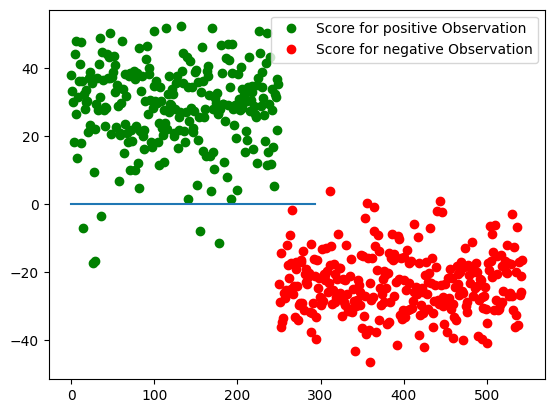

TP, TN, FP, FN for the cascade classifier:
0.976 0.9897959183673469 0.01020408163265306 0.024


In [13]:
with open('cascade_1.pkl', 'rb') as file:
    cascade_1 = pickle.load(file)

with open('cascade_2.pkl', 'rb') as file:
    cascade_2 = pickle.load(file)

cascade = cascade_1 + cascade_2

print("Now running cascade on the testing set")

FP_test = 0.0
FN_test = 0.0
TP_test = 0.0
TN_test = 0.0

scores = []

with open('final_cascade.txt', 'w') as file_cascade:

    file_cascade.write("CASCADE: \n")
    f_cnt=1

    for el in cascade:
        
        file_cascade.writelines("Best Classifier in Cascade: \n")
        file_cascade.writelines(f"#{str(f_cnt):}: \n")
        file_cascade.writelines(f"Best_Classfier.haar.type: {el.haar.type}\n")
        file_cascade.writelines(f"Best_Classfier.haar.size: {el.haar.size}\n")
        file_cascade.writelines(f"Best_Classfier.haar.feature.shape: {el.haar.feature.shape}\n")
        file_cascade.writelines(f"Best_Classfier.haar.shape: {el.haar.shape}\n")
        file_cascade.writelines(f"Best_Classfier.haar.start: {el.haar.start}\n")
        file_cascade.writelines(f"Best_Classfier.theta: {str(el.theta)}\n")
        file_cascade.writelines(f"Best_Classfier.sign: {str(el.sign)}\n")
        file_cascade.writelines(f"Best_Classfier.weight: {str(el.weight)}\n\n")

        f_cnt+=1

save = False

for t in range(len(testing_set)):
    strong_score = 0.0
    for w_class in cascade:
        #print("Loc: " +str(w_class.haar.start))
        strong_score += w_class.weight * predict(get_haar_score_fast(w_class.haar, testing_set[t], testing_integrals[t]), w_class)
    clas = np.sign(strong_score)
    scores.append(strong_score)

    if testing_labels[t] == 1 and clas == -1:
        FN_test += 1
        if save:
            plt.imshow(testing_set[t], interpolation='nearest')
            plt.savefig("FN/"+str(t)+".jpg")
    if testing_labels[t] == -1 and clas == 1:
        FP_test += 1
        if save:
            plt.imshow(testing_set[t], interpolation='nearest')
            plt.savefig("FP/"+str(t)+".jpg")
    if testing_labels[t] == 1 and clas == 1:
        TP_test += 1
        if save:
            plt.imshow(testing_set[t], interpolation='nearest')
            plt.savefig("TP/"+str(t)+".jpg")
    if testing_labels[t] == -1 and clas == -1:
        TN_test += 1
        if save:
            plt.imshow(testing_set[t], interpolation='nearest')
            plt.savefig("TN/"+str(t)+".jpg")

    #print(testing_labels[t]==clas)
    #print(testing_labels[t])
    #print(clas)


#print(FP_test/(2*nrNeg_test))+(FN_test/(2*nrPos_test))
#print(FP_test)
#print(FN_test)

plt.plot(range(nrPos_test), scores[0:nrPos_test], "go", label="Score for positive Observation")
plt.plot(range(nrPos_test,nrPos_test+nrNeg_test), scores[nrPos_test:], "ro", label="Score for negative Observation")
plt.plot(range(nrNeg_test), [0]*nrNeg_test)
plt.legend()
plt.show()

print("TP, TN, FP, FN for the cascade classifier:")
print(TP_test/nrPos_test, TN_test/nrNeg_test, FP_test/nrNeg_test, FN_test/nrPos_test)





### Detect Circle

In [70]:

def detect_circle(image, original_size, priority_big_scale, no_max_suppression_treshold, observation_for_circle):

    result = detect_faces(image, cascade, priority_big_scale, no_max_suppression_treshold, observation_for_circle)
    image = cv2.resize(image, (original_size, original_size))


    if result == None:
        cv2.imshow('Detected Faces', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        return


    for r in range(0, len(result)):
        center = (int(result[r][0] * original_size / window_size), int(result[r][1] * original_size / window_size)) 
        radius = int(result[r][2]* original_size / window_size)
        cv2.circle(image, center, radius, (0, 255, 0), 2)


    cv2.imshow('Detected Faces', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


* #### Detect circle su immagini con solo una persona

In [113]:
#param observation_for_circle =1

image = cv2.imread('Dataset\\Person\\person_2.jpg')
detect_circle(image, 180, True, 0.0, 1)

In [114]:
#param observation_for_circle = 0.5

image = cv2.imread('Dataset\\Person\\person_2.jpg')
detect_circle(image, 180, True, 0.0, 0.5)


In [115]:
#param observation_for_circle = 0.5

image = cv2.imread('Dataset\\Person\\person_4.jpg')
detect_circle(image, 180, True, 0.0, 0.5)

In [116]:
#param observation_for_circle = 0.5

image = cv2.imread('Dataset\\Person\\person_6.jpg')
detect_circle(image, 180, True, 0.0, 0.5)

In [117]:
#param observation_for_circle = 0.5

image = cv2.imread('Dataset\\Person\\person_7.jpg')
detect_circle(image, 180, True, 0.0, 0.5)


In [118]:
#param no_max_suppression_treshold = 0
#param observation_for_circle = 0.5
#param priority_big_scale = False

image = cv2.imread('Dataset\\Person\\person_7.jpg')
detect_circle(image, 180, False, 0.0, 0.5)


In [131]:
#param no_max_suppression_treshold = 1
#param observation_for_circle = 0.5
#param priority_big_scale = False

image = cv2.imread('Dataset\\Person\\person_7.jpg')
detect_circle(image, 180, False, 1, 0.5)

Come si vede dagli esempi precedenti il parametro priority_big_scale se impostato a True darà un peso maggiore ai cerchi trovati su una scala di immagine maggiori se su False farà il contrario.

Questo servirà alla funzione non_max_suppression per eliminare i cerchi che si sovrappongono nell'immagine tenendo conto della loro importanza.

* #### Detect circle su immagini di gruppo

In [122]:
#param priority_big_scale = True
#param no_max_suppression_treshold = 0
#param observation_for_circle = 1

image = cv2.imread('Dataset\\Varie\\oscar.jpg')
detect_circle(image, 300, True, 0, 1)

In [121]:
#param priority_big_scale = False
#param no_max_suppression_treshold = 0
#param observation_for_circle = 1

image = cv2.imread('Dataset\\Varie\\oscar.jpg')
detect_circle(image, 300, False, 0, 1)

In [83]:
#param priority_big_scale = False
#param no_max_suppression_treshold = 0
#param observation_for_circle = 0.65

image = cv2.imread('Dataset\\Varie\\oscar.jpg')
detect_circle(image, 300, False, 0, 0.65)

In [107]:
#param priority_big_scale = False
#param no_max_suppression_treshold = 0.1
#param observation_for_circle = 0.65

image = cv2.imread('Dataset\\Varie\\oscar.jpg')
detect_circle(image, 300, False, 0.1, 0.65)

## Conclusioni

In questo progetto è stato portato un sistema di face detection che ha raggiunto i seguenti risultati:


* Ottime capacità di rilevare se in un'immagine ci sono volti: 0.976% (TP)
* Ottime capacità di rilevare se in un'immagine non ci sono volti: 0.989% (FP)
* Ottime capacità nel definire un cerchio che contiene il volto di una persona nel caso di immagini con persone singole.
* Sufficienti capacità nel definire un cerchio che contiene il volto di una persona nel caso di immagini con più persone.

Implementazioni future:

* Migliorare le capacità dell'algoritmo di disegnare cerchi nel caso di immagini con più persone, alcuni suggerimenti potrebbero essere:
    1. Allenare l'algoritmo usando piu Osservazioni
    2. Migliorare la funzione detect_faces, la quale contiene una logica abbastanza basica per il disegno dei cerchi.



